# Clean pe_contratos


### Goals
- Propose query to clean data
- Understand the content of the most important fields
- Clean the key rows
- Generate insights about possible further research

### Query

```DROP TABLE IF EXISTS analise_corrupcao_cluster.pe_contratos;
CREATE TABLE analise_corrupcao_cluster.pe_contratos AS (
SELECT
  unidadegestora,
  esfera,
  municipio,
  anocontrato,
  cpf_cnpj,
  tipodocumento,
  numerodocumento,
  TRIM(numerodocumentoajustado) numerodocumentoajustado,
  razaosocial,
  vigencia,
  objeto,
  valorcontrato,
  estagiocontrato,
  situacaocontrato,
  siglaug,
  codigoug,
  codigoaudinug,
  tipoprocesso,
  numeroprocesso,
  anoprocesso,
  portariacomissaolicitacao,
  linkarquivo,
  numerocontrato
FROM br_gov_despesas_municipais_tce_pe_contratos.contratos
WHERE numerodocumentoajustado !~ '[A-Z]+|,');
  ```

### Results

 The fields that are most importants, for know, are the key ones **numerodocumentoajustado** and **codigoug** because they are necessary to bind data with different tables.
 
 Everything seems normal. The correlation between fields also seem fine.
 
 As usual, there are few companies that share most of the contracts. I did not get the proportions, but this is a interesting investigations topic.

### Methodology

In [1]:
from sqlalchemy import create_engine
import pandas as pd
from pandas_summary import DataFrameSummary
import copy
import seaborn as sns

pd.options.display.max_columns = 999

import yaml
con_link = yaml.load(open('db_links.yaml', 'r'))['postgre']
con = create_engine(con_link)

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 12)

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Count the number of rows

In [19]:
pd.read_sql_query('SELECT COUNT(*) FROM br_gov_despesas_municipais_tce_pe_contratos.contratos', con).values[0][0]

119841

### Describe colums

In [2]:
full = pd.read_sql_query('SELECT * FROM br_gov_despesas_municipais_tce_pe_contratos.contratos', con)

In [23]:
full.head(2)

,unidadegestora,esfera,municipio,anocontrato,cpf_cnpj,tipodocumento,numerodocumento,numerodocumentoajustado,razaosocial,vigencia,objeto,valorcontrato,estagiocontrato,situacaocontrato,siglaug,codigoug,codigoefiscoug,codigoaudinug,tipoprocesso,numeroprocesso,anoprocesso,portariacomissaolicitacao,linkarquivo,numerocontrato
0,Tribunal de Contas do Estado de Pernambuco,E,Recife,2010,020.618.434-41,CPF,020.618.434-41,02061843441,MARIA DE FATIMA WAECHTER FINIZOLA ...,01/12/2010 a 28/02/2011,3.117 CONSULTORIA,24733.33,Fim de Vigência,Regular,TCE/PE,780,020001,999.004,None,None,None,None,None,079
1,Tribunal de Contas do Estado de Pernambuco,E,Recife,2008,00.028.986/0001-08,CNPJ,00.028.986/0001-08,00028986000108,ELEVADORES ATLAS SCHINDLER S/A ...,03/12/2008 a 02/12/2009,2.010 MANUTENÇÃO E CONSERVAÇÃO DE BENS IMÓVEIS,24000.00,Fim de Vigência,Regular,TCE/PE,780,020001,999.004,None,None,None,None,None,076


In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119841 entries, 0 to 119840
Data columns (total 24 columns):
unidadegestora               119841 non-null object
esfera                       119841 non-null object
municipio                    119841 non-null object
anocontrato                  119841 non-null object
cpf_cnpj                     119841 non-null object
tipodocumento                119841 non-null object
numerodocumento              119841 non-null object
numerodocumentoajustado      119841 non-null object
razaosocial                  119841 non-null object
vigencia                     119841 non-null object
objeto                       119841 non-null object
valorcontrato                119841 non-null float64
estagiocontrato              119841 non-null object
situacaocontrato             119841 non-null object
siglaug                      115076 non-null object
codigoug                     119841 non-null object
codigoefiscoug               19110 non-null object
codig

In [29]:
full_desc = DataFrameSummary(full)

In [30]:
full_desc.columns_types

categorical    21
bool            2
numeric         1
Name: types, dtype: int64

In [32]:
full_desc.columns_stats

,unidadegestora,esfera,municipio,anocontrato,cpf_cnpj,tipodocumento,numerodocumento,numerodocumentoajustado,razaosocial,vigencia,objeto,valorcontrato,estagiocontrato,situacaocontrato,siglaug,codigoug,codigoefiscoug,codigoaudinug,tipoprocesso,numeroprocesso,anoprocesso,portariacomissaolicitacao,linkarquivo,numerocontrato
counts,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,115076,119841,19110,119841,85092,85092,85092,85092,119760,119841
uniques,891,2,184,39,30331,3,30331,30328,37617,33156,280,57651,2,9,520,891,101,891,21,2780,10,1540,119732,5870
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4765,0,100731,0,34749,34749,34749,34749,81,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,3.98%,0%,84.05%,0%,29.00%,29.00%,29.00%,29.00%,0.07%,0%
types,categorical,bool,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numeric,bool,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical


Existem muitos dados faltantes para
- tipoprocesso
- numeroprocesso
- anoprocesso
- portatiacomissaolicitacao
- codigoug

In [38]:
full_numeric = copy.deepcopy(full)

for col in full.columns:
    
    full_numeric[col] = full_numeric[col].astype("category").cat.codes

In [40]:
full_num_desc = DataFrameSummary(full_numeric)

In [51]:
full_numeric.head(2)

,unidadegestora,esfera,municipio,anocontrato,cpf_cnpj,tipodocumento,numerodocumento,numerodocumentoajustado,razaosocial,vigencia,objeto,valorcontrato,estagiocontrato,situacaocontrato,siglaug,codigoug,codigoefiscoug,codigoaudinug,tipoprocesso,numeroprocesso,anoprocesso,portariacomissaolicitacao,linkarquivo,numerocontrato
0,886,0,129,15,2395,1,2395,1831,24866,1843,264,16369,1,3,513,809,1,779,-1,-1,-1,-1,-1,1185
1,886,0,129,13,15,0,15,26,10905,4461,107,16068,1,3,513,809,1,779,-1,-1,-1,-1,-1,1178


In [41]:
full_num_desc.columns_types

numeric    22
bool        2
Name: types, dtype: int64

In [42]:
full_num_desc.columns_stats

,unidadegestora,esfera,municipio,anocontrato,cpf_cnpj,tipodocumento,numerodocumento,numerodocumentoajustado,razaosocial,vigencia,objeto,valorcontrato,estagiocontrato,situacaocontrato,siglaug,codigoug,codigoefiscoug,codigoaudinug,tipoprocesso,numeroprocesso,anoprocesso,portariacomissaolicitacao,linkarquivo,numerocontrato
counts,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841,119841
uniques,891,2,184,39,30331,3,30331,30328,37617,33156,280,57651,2,9,521,891,102,891,22,2781,11,1541,119733,5870
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,bool,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


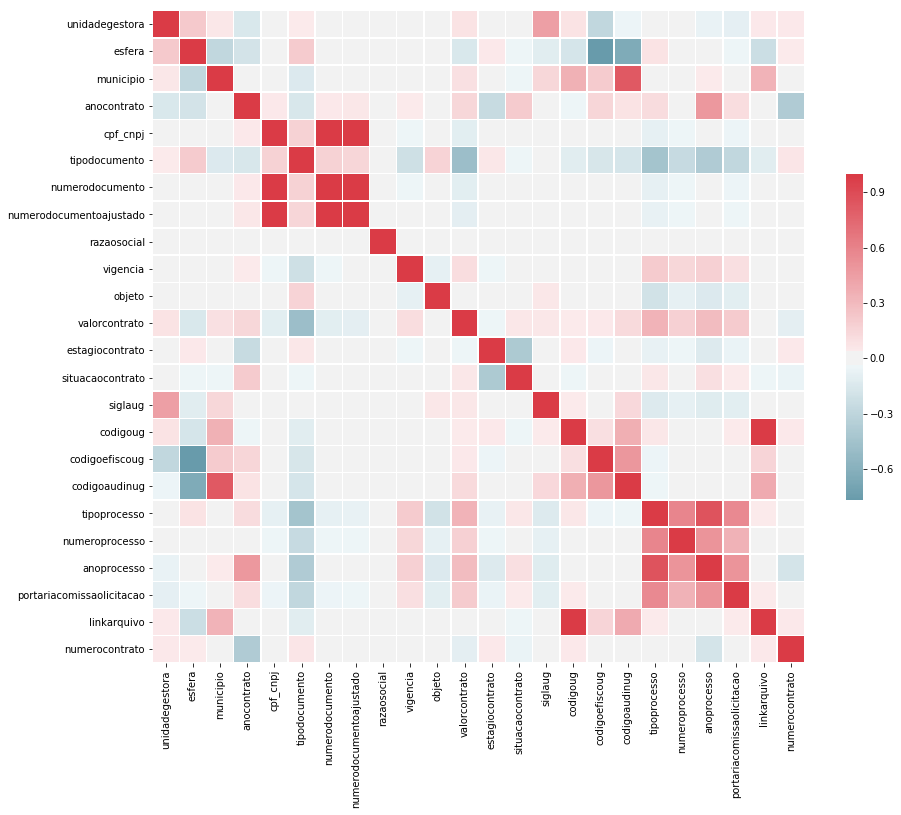

In [61]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = full_numeric.corr()
sns.heatmap(corr, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [86]:
a = corr.abs()

os = (a.where(np.triu(np.ones(a.shape), k=1).astype(np.bool)).stack()).sort_values(ascending=False)
os.head(15)

cpf_cnpj         numerodocumento              1.000000
numerodocumento  numerodocumentoajustado      0.999336
cpf_cnpj         numerodocumentoajustado      0.999336
codigoug         linkarquivo                  0.988070
tipoprocesso     anoprocesso                  0.856021
municipio        codigoaudinug                0.833796
esfera           codigoefiscoug               0.766711
                 codigoaudinug                0.639923
tipoprocesso     numeroprocesso               0.586570
                 portariacomissaolicitacao    0.563510
anoprocesso      portariacomissaolicitacao    0.512240
numeroprocesso   anoprocesso                  0.507287
codigoefiscoug   codigoaudinug                0.492244
tipodocumento    valorcontrato                0.486471
anocontrato      anoprocesso                  0.485621
dtype: float64

As correlações mais relevantes são esperadas.

- Relacionadas ao documento: CPF_CNPJ/ numerodocumentoajustado
- UG do processo e key fields: codigoug/linkarquivo, municipio/codigoaudinug ...
- Ano do processo e key fields: codigoefiscoug/codigoaudinug, ...

Interessante notar que o valor do contrato (valorcontrato) tem uma correlação negativa com o tipodocumento e tipoprocesso.

### numerodocumentoajustado

In [88]:
full_desc['numerodocumentoajustado']

top             08778201000126      : 586
counts                             119841
uniques                             30328
missing                                 0
missing_perc                           0%
types                         categorical
Name: numerodocumentoajustado, dtype: object

In [3]:
a = []
def to_int(x):
    
    try:
        return int(x)
    except:
        a.append(x)
        return None

full['numerodocumentoajustado'] = full['numerodocumentoajustado'].apply(to_int)

In [5]:
a

['OAB: 13136          ',
 'OAB 019056DPE       ',
 '4579380 SSPPE       ',
 'CREA PE 37220 TD    ',
 'CC 1032412447       ',
 'OABPE 33650         ',
 'OABPE 15972         ',
 '4579380 SSPPE       ',
 '6,164,936           ',
 'CRP0215070          ',
 '26504D              ',
 '1565068 SDS PE      ',
 '13BF72939           ',
 'OAB 11313PE         ']

In [8]:
len(a)

14

In [21]:
doc = pd.read_sql_query("""
        SELECT *
        FROM br_gov_despesas_municipais_tce_pe_contratos.contratos
        WHERE numerodocumentoajustado ~ '\d+'""", con)

In [22]:
a = []
def to_int(x):
    
    try:
        return int(x)
    except:
        a.append(x)
        return None


doc['numerodocumentoajustado'] = doc['numerodocumentoajustado'].apply(to_int)

Somente 14 entradas do numerodocumentoajustado não são transformáveis em inteiros que são relaciondos ao CPF.

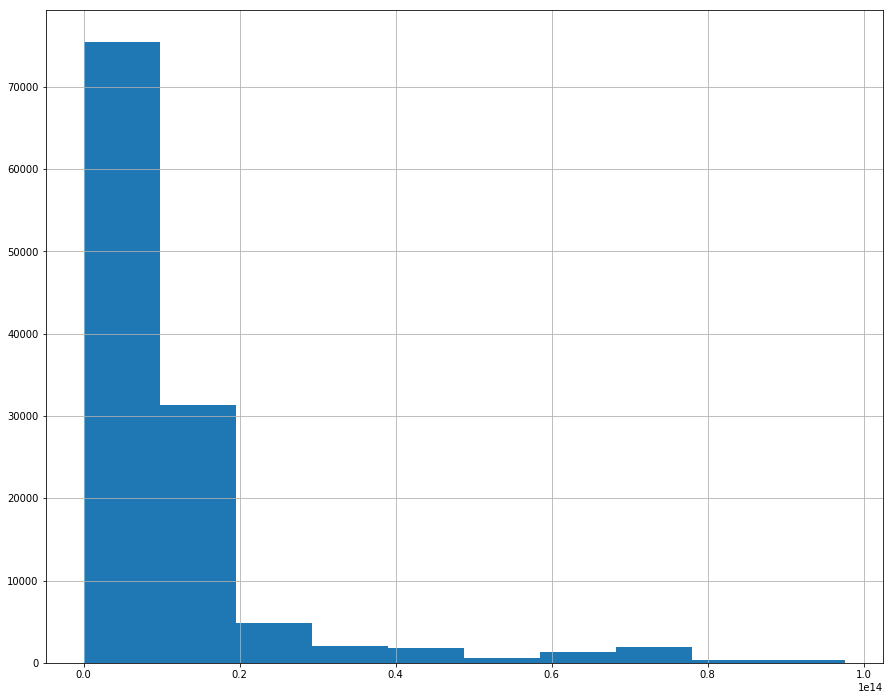

In [107]:
full['numerodocumentoajustado'].hist()

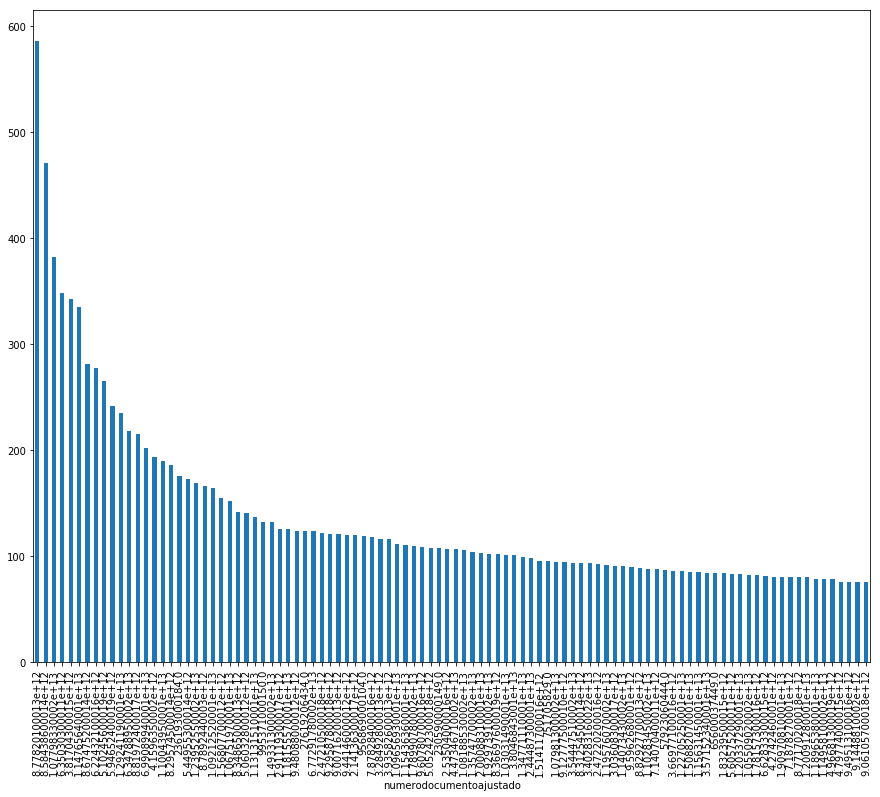

In [16]:
full.groupby('numerodocumentoajustado').count()['esfera'].sort_values(ascending=False).iloc[0:100].plot(kind='bar')

### codigoug

In [10]:
a = []
def to_int(x):
    
    try:
        return int(x)
    except:
        a.append(x)
        return None

full['codigoug'] = full['codigoug'].apply(to_int)

In [11]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119841 entries, 0 to 119840
Data columns (total 24 columns):
unidadegestora               119841 non-null object
esfera                       119841 non-null object
municipio                    119841 non-null object
anocontrato                  119841 non-null object
cpf_cnpj                     119841 non-null object
tipodocumento                119841 non-null object
numerodocumento              119841 non-null object
numerodocumentoajustado      119827 non-null float64
razaosocial                  119841 non-null object
vigencia                     119841 non-null object
objeto                       119841 non-null object
valorcontrato                119841 non-null float64
estagiocontrato              119841 non-null object
situacaocontrato             119841 non-null object
siglaug                      115076 non-null object
codigoug                     119841 non-null int64
codigoefiscoug               19110 non-null object
codig

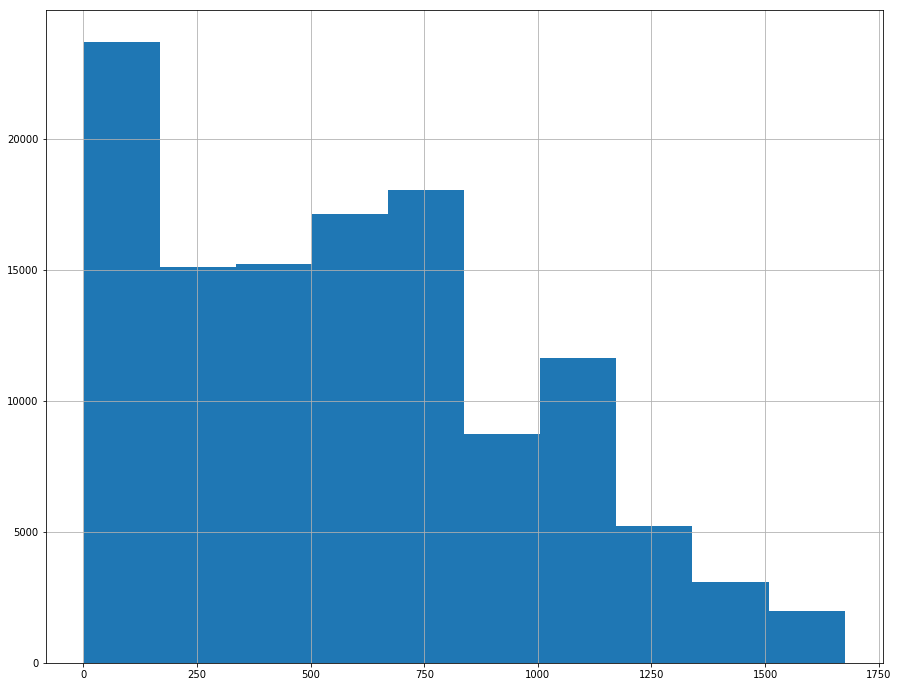

In [12]:
full['codigoug'].hist()

In [18]:
full.groupby('codigoug').count()['esfera'].sort_values(ascending=False).head(20)

codigoug
109     2371
1045    2262
504     2182
838     2165
128     1801
708     1593
363     1520
293     1515
360     1267
158     1201
802     1140
471     1090
166     1081
84      1044
727     1000
66       967
591      967
611      925
130      907
235      851
Name: esfera, dtype: int64